In [86]:
# import keras
import os
import theano
# Switch backen to theano
os.environ['KERAS_BACKEND'] = 'theano'
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN"
from keras import models
from keras import layers
import pandas as pd

In [87]:
df_train = pd.read_csv("data/workshop_train.csv")

In [88]:
df_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,10633_1,0,I watched this video at a friend's house. I'm ...
2,319_1,0,"A friend of mine bought this film for £1, and ..."
3,6811_10,1,Although I generally do not like remakes belie...
4,7369_1,0,"I had a feeling that after \Submerged\"", this ..."


In [4]:
from bs4 import BeautifulSoup 
# The package comes built-in with Python
import re
# http://www.nltk.org/install.html
import nltk 

In [5]:
from nltk.corpus import stopwords # Import the stop word list
stops = set(stopwords.words("english"))

In [6]:
# Pre-processing step
def text_to_words(raw_text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_text).get_text() 

    # 2. Remove non-letters
    # Find anything that is NOT a lowercase letter (a-z) or an upper case letter (A-Z), and replace it with a space
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    # stops = set(stopwords.words("english"))
    
    # There are many other things we could do to the data
    # For example, Porter Stemming and Lemmatizing (both available in NLTK) 
    # would allow us to treat "messages", "message", and "messaging" as the same word
    # which could certainly be useful.
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    clear_text = " ".join(meaningful_words)
    return clear_text
    #validate_text_sentiment["Message"][i] = clear_text 
    #print i
    #return( " ".join( meaningful_words ))  

In [7]:
# Use the apply function in pandas to apply the function
# axis = 1 specifier means that the application is done at a row than a column level
df_train['cleaned_text'] = df_train.apply (lambda row: text_to_words(row.review), axis=1)

/Users/ayush/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/ayush/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
from sklearn.model_selection import train_test_split
df_train, df_validate = train_test_split(df_train, test_size=0.2)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(df_train['cleaned_text'].values.astype('U'))
train_data_features = train_data_features.toarray()

In [11]:
import numpy as np

In [12]:
train_labels = df_train.sentiment.values
y_train = np.asarray(train_labels).astype('float32')

In [13]:
y_train

array([ 1.,  1.,  0., ...,  1.,  1.,  1.], dtype=float32)

In [14]:
validate_data_features = vectorizer.transform(df_validate['cleaned_text'].values.astype('U'))
validate_data_features = validate_data_features.toarray()

In [15]:
val_labels = df_validate.sentiment.values
y_val = np.asarray(val_labels).astype('float32')

In [16]:
# The core data structure of Keras is a model
# The simplest type of model is the Sequential model
# Sequential model a linear stack of layers

In [89]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))   

In [90]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [101]:
history = model.fit(train_data_features,
                    y_train,
                    nb_epoch=15, batch_size=512, validation_split = 0.2)

Train on 8074 samples, validate on 2019 samples
Epoch 1/15
4096/8074 [==============>...............] - ETA: 0s - loss: 0.0289 - acc: 0.9961

/Users/ayush/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


8074/8074 [==============================] - 0s 61us/step - loss: 0.0256 - acc: 0.9970 - val_loss: 0.5187 - val_acc: 0.8479
Epoch 2/15
8074/8074 [==============================] - 0s 43us/step - loss: 0.0226 - acc: 0.9973 - val_loss: 0.5368 - val_acc: 0.8465
Epoch 3/15
8074/8074 [==============================] - 0s 51us/step - loss: 0.0200 - acc: 0.9979 - val_loss: 0.5532 - val_acc: 0.8465
Epoch 4/15
8074/8074 [==============================] - 0s 42us/step - loss: 0.0178 - acc: 0.9979 - val_loss: 0.5706 - val_acc: 0.8455
Epoch 5/15
8074/8074 [==============================] - 0s 54us/step - loss: 0.0157 - acc: 0.9981 - val_loss: 0.5884 - val_acc: 0.8445
Epoch 6/15
8074/8074 [==============================] - 0s 51us/step - loss: 0.0142 - acc: 0.9984 - val_loss: 0.6066 - val_acc: 0.8445
Epoch 7/15
8074/8074 [==============================] - 0s 42us/step - loss: 0.0131 - acc: 0.9985 - val_loss: 0.6312 - val_acc: 0.8425
Epoch 8/15
8074/8074 [==============================] - 0s 55us/st

In [102]:
history_dict = history.history
# print history_dict
print history_dict.get('val_acc')

[0.84794452722973612, 0.84645864132786219, 0.84645864935780946, 0.84546805192716878, 0.84447746875558882, 0.84447746875558882, 0.84249628635253448, 0.83803863224858044, 0.84249628012342104, 0.84447746432730919, 0.84150569072272763, 0.84001981465163478, 0.83803862601946699, 0.83803862601946699, 0.8390292154201604]


In [103]:
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

# Plotting the training and validation loss

In [104]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

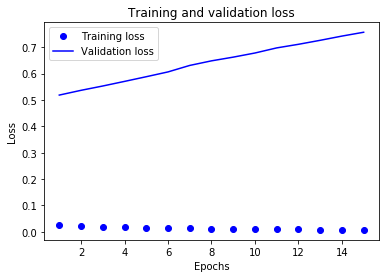

In [105]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

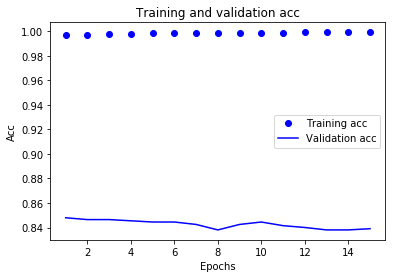

In [106]:
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Validation

In [107]:
val_predict = model.predict(validate_data_features)
val_predict = categorical_probas_to_classes(val_predict)

In [108]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_val, val_predict, target_names=target_names))

             precision    recall  f1-score   support

          0       0.16      0.17      0.16      1231
          1       0.18      0.17      0.17      1293

avg / total       0.17      0.17      0.17      2524



# Prediction

In [109]:
df_test = pd.read_csv("data/workshop_test.csv")

In [110]:
df_test['cleaned_text'] = df_test.apply (lambda row: text_to_words(row.review), axis=1)
test_data_features = vectorizer.transform(df_test['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

In [111]:
# Generating predictions for new data
prediction = model.predict(test_data_features)
print prediction

[[ 0.00233898]
 [ 0.00161203]
 [ 0.75778043]
 ..., 
 [ 0.00153205]
 [ 0.001571  ]
 [ 0.00152406]]


In [112]:
def categorical_probas_to_classes(p):
    res = []
    for i in p:
        if i[0] > 0.5:
            res.append(1)
        else:
            res.append(0)
    return res
#     return np.argmax(p, axis=1)

In [113]:
actual_prediction = categorical_probas_to_classes(prediction)

In [ ]:
# actual_prediction

# Recurrent Neural Network

In [36]:
from keras.preprocessing import sequence

In [79]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

In [80]:
max_features = 5000

In [114]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [116]:
history = model.fit(train_data_features, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 8074 samples, validate on 2019 samples
Epoch 1/5
8074/8074 [==============================] - 159s 20ms/step - loss: 0.6984 - acc: 0.5337 - val_loss: 0.7294 - val_acc: 0.4928
Epoch 2/5
8074/8074 [==============================] - 262s 32ms/step - loss: 0.7102 - acc: 0.5255 - val_loss: 0.6944 - val_acc: 0.5419
Epoch 3/5
8074/8074 [==============================] - 729s 90ms/step - loss: 0.7013 - acc: 0.5266 - val_loss: 0.7064 - val_acc: 0.5032
Epoch 4/5
8074/8074 [==============================] - 7352s 911ms/step - loss: 0.7050 - acc: 0.5093 - val_loss: 0.6920 - val_acc: 0.5087
Epoch 5/5
8074/8074 [==============================] - 85s 11ms/step - loss: 0.6924 - acc: 0.5170 - val_loss: 0.6906 - val_acc: 0.5131


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping = EarlyStopping(patience=1, verbose=1)
checkpointer = ModelCheckpoint(
    filepath='model-weights' + "-" + "{epoch:02d}-" + str(
        time.time()) + ".hdf5",
    verbose=2, save_best_only=True)